# Final Delivarable

# Download Dataset


In [1]:
## For Colab or Online Platform

import os

if 'Forest_fire.zip' not in os.listdir():
  !gdown '1DkpOC9dDaUdg0TyKNSJqKrKv7Dp1gp6a'
  !unzip '/content/Forest_fire.zip'

# Importing necessary Libreries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import warnings
warnings.filterwarnings("ignore")

# Data Augmentation

In [2]:
# Data Generator

train_data_generator = ImageDataGenerator(rescale=1./255,
                                          rotation_range=90,
                                          width_shift_range=0.4,
                                          fill_mode='reflect',
                                          vertical_flip=True,
                                          channel_shift_range=150.0,
                                          zoom_range=[0.5, 1.5],
                                          shear_range=45.0,
                                          brightness_range=(0.2, 0.8))

test_data_generator = ImageDataGenerator(rescale=1./255)

In [4]:
# Data generation

train_data = train_data_generator.flow_from_directory('Dataset/train_set',
                                                      target_size=(64,64),
                                                      batch_size=50,
                                                      class_mode='binary',
                                                      shuffle=True,
                                                      color_mode='rgb')

test_data = test_data_generator.flow_from_directory('Dataset/test_set',
                                                      target_size=(64,64),
                                                      batch_size=50,
                                                      class_mode='binary',
                                                      shuffle=True,
                                                      color_mode='rgb')

Found 436 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


# Model Building

In [ ]:
model = Sequential()

#convolution and Pooling layer 1
model.add(Conv2D(filters=48,kernel_size=3,activation='relu',input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Dropout(0.2))

#convolution and Pooling layer 2
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Dropout(0.2))

#Flattening the images
model.add(Flatten())

#Fully Connected layers
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 48)        1344      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 48)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 48)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        13856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0

In [7]:
# Adding call to Avoid Overfitting

early_stop = EarlyStopping(monitor="val_accuracy",
                           min_delta=0.003,
                           patience=6, 
                           verbose=1, 
                           mode='auto',
                           restore_best_weights=True)

lr = ReduceLROnPlateau(monitor="val_accuracy",
                      factor=0.2,
                      patience=3,
                      verbose=1,
                      mode="auto",
                      min_delta=0.003,
                      cooldown=1)

callback = [early_stop,lr]

In [8]:
# Compiling The Model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [74]:
# Fit The Model

result = model.fit(train_data,
                  epochs=30,
                  callbacks=callback,
                  validation_data=test_data)

Epoch 1/30
9/9 [==============================] - 76s 2s/step - loss: 0.6897 - accuracy: 0.6147 - val_loss: 0.6331 - val_accuracy: 0.5950 - lr: 0.0010
Epoch 2/30
9/9 [==============================] - 17s 2s/step - loss: 0.6303 - accuracy: 0.6445 - val_loss: 0.5027 - val_accuracy: 0.5950 - lr: 0.0010
Epoch 3/30
9/9 [==============================] - 23s 3s/step - loss: 0.5601 - accuracy: 0.6674 - val_loss: 0.3724 - val_accuracy: 0.8430 - lr: 0.0010
Epoch 4/30
9/9 [==============================] - 22s 3s/step - loss: 0.4884 - accuracy: 0.7775 - val_loss: 0.1648 - val_accuracy: 0.9504 - lr: 0.0010
Epoch 5/30
9/9 [==============================] - 18s 2s/step - loss: 0.3731 - accuracy: 0.8509 - val_loss: 0.1235 - val_accuracy: 0.9421 - lr: 0.0010
Epoch 6/30
9/9 [==============================] - 20s 2s/step - loss: 0.3718 - accuracy: 0.8303 - val_loss: 0.0798 - val_accuracy: 0.9752 - lr: 0.0010
Epoch 7/30
9/9 [==============================] - 22s 3s/step - loss: 0.3201 - accuracy: 0.848

## Visualizing The Model Training

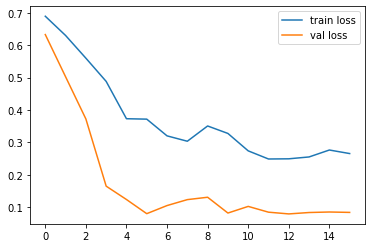

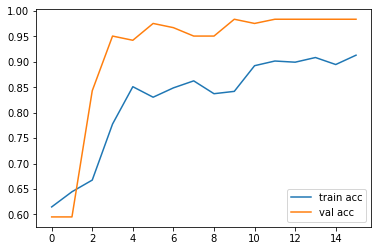

In [81]:
#plot the loss
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(result.history['accuracy'], label='train acc')
plt.plot(result.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [78]:
np.save('my_history.npy',result.history)

# Save Model

In [13]:
model.save('Files/forest1.h5')

# Test Model

In [9]:
saved_model = load_model('Files/forest1.h5')

## Predict

In [10]:
def testing(img):
    classes = ['No Issues', 'There is Fire!!']
    img = image.load_img(img,target_size=(64,64)) 
    x = image.img_to_array(img) 
    x = np.expand_dims(x,axis=0) 
    pred = saved_model.predict(x).flatten()
    print("Predicted class as:",classes[1] if pred else classes[0])

def img_show(img):
    img1 = image.load_img(img,target_size=(64,64)) 
    plt.imshow(img1)

1/1 [==============================] - 6s 6s/step
Predicted class as: No Issues


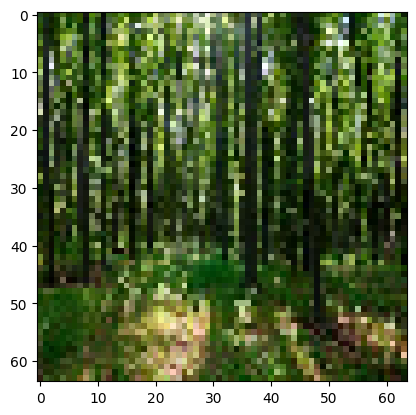

In [11]:
# Test 1

img_show('Dataset/test_set/forest/0.72918000_1559733279_forests1_gettyimages_.jpg')
testing('Dataset/test_set/forest/0.72918000_1559733279_forests1_gettyimages_.jpg')

1/1 [==============================] - 0s 68ms/step
Predicted class as: No Issues


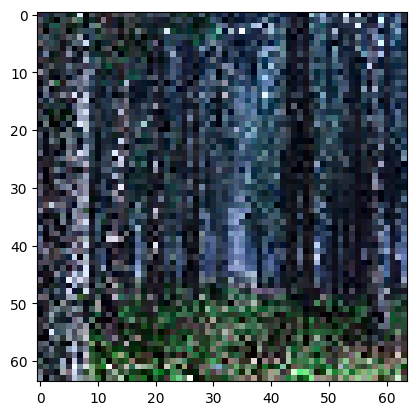

In [13]:
# Test 2 

img_show('Dataset/test_set/forest/europeslostf.jpg')
testing('Dataset/test_set/forest/europeslostf.jpg')

1/1 [==============================] - 0s 244ms/step
Predicted class as: No Issues


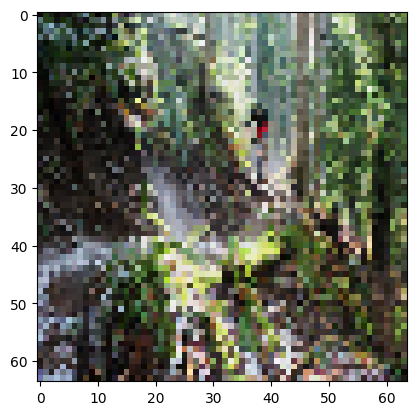

In [15]:
# Test 3
img_show('Dataset/test_set/forest/em_tiger_mountain_570x284_nc.jpg')
testing('Dataset/test_set/forest/em_tiger_mountain_570x284_nc.jpg')

1/1 [==============================] - 0s 71ms/step
Predicted class as: There is Fire!!


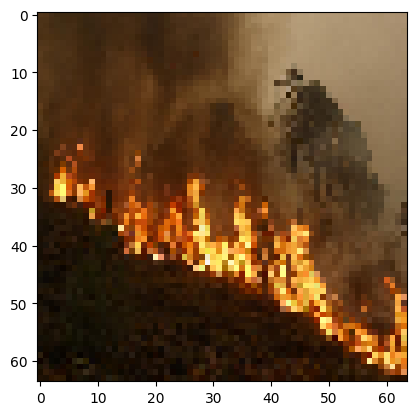

In [16]:
# Test 4

img_show('Dataset/train_set/with fire/with fire (2).jpeg')
testing('Dataset/train_set/with fire/with fire (2).jpeg')

1/1 [==============================] - 0s 63ms/step
Predicted class as: There is Fire!!


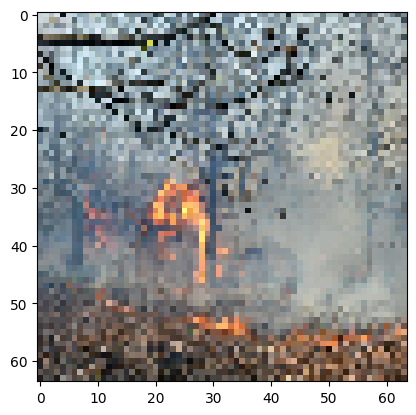

In [17]:
# Test 5

img_show('Dataset/train_set/with fire/with fire (10).jpg')
testing('Dataset/train_set/with fire/with fire (10).jpg')

1/1 [==============================] - 0s 105ms/step
Predicted class as: There is Fire!!


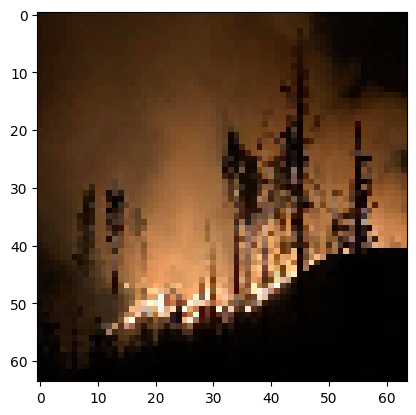

In [18]:
# Test 6

img_show('Dataset/train_set/with fire/with fire (22).jpg')
testing('Dataset/train_set/with fire/with fire (22).jpg')

## Google Pics

In [30]:
# PreProcess
# Not For Offline

import os
import requests
import shutil

if 'Google_download' not in os.listdir():
  !mkdir 'Google_download'

def download_image(url):
    files = len(os.listdir('Google_download'))
    res = requests.get(url, stream=True)
    with open(f'Google_download/Download{files}.jpg','wb') as f:
        shutil.copyfileobj(res.raw, f)


In [ ]:
# Don't Run for offline running

url_list = ['https://greatergood.berkeley.edu/images/uploads/Forest_in_Japan.jpg',
            'https://www.timeforkids.com/wp-content/uploads/2019/09/final-cover-forest.jpg?w=1024',
            'https://images.livemint.com/img/2021/07/30/600x338/51719351b54642eb9c01296c8d8a3f60-51719351b54642eb9c01296c8d8a3f60-0_1627644472436_1627644512422.jpg',
            'https://i0.wp.com/blog.frontiersin.org/wp-content/uploads/2022/03/frontiers-in-remote-sensing-global-forest-fires-map.png?resize=940%2C529&ssl=1']

_ =  [download_image(x) for x in url_list ]            

1/1 [==============================] - 5s 5s/step
Predicted class as: No Issues


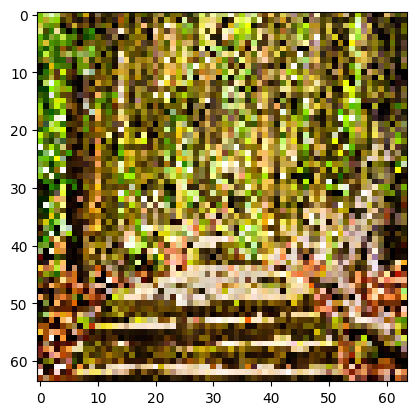

In [32]:
# Test 1

img_show('Google_download/Download0.jpg')
testing('Google_download/Download0.jpg')

1/1 [==============================] - 1s 1s/step
Predicted class as: No Issues


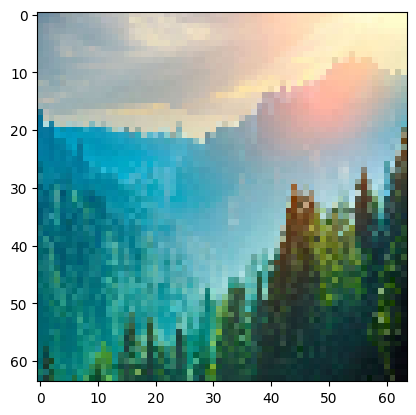

In [33]:
# Test 2

img_show('Google_download/Download1.jpg')
testing('Google_download/Download1.jpg')

1/1 [==============================] - 0s 275ms/step
Predicted class as: There is Fire!!


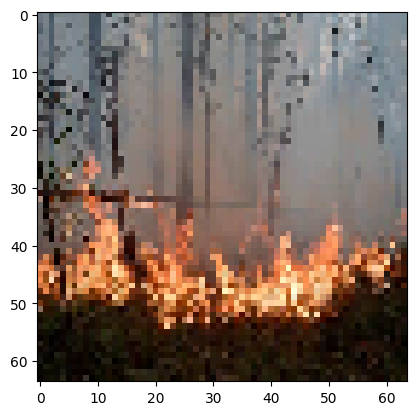

In [34]:
# Testing 3

img_show('Google_download/Download2.jpg')
testing('Google_download/Download2.jpg')

1/1 [==============================] - 0s 98ms/step
Predicted class as: There is Fire!!


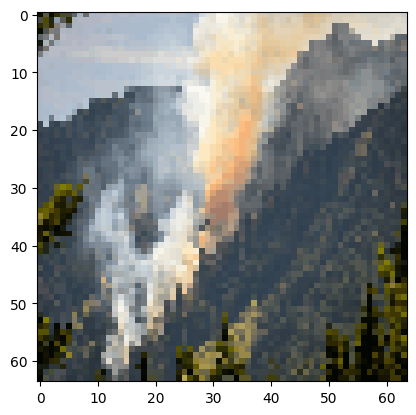

In [35]:
# Test 4

img_show('Google_download/Download3.jpg')
testing('Google_download/Download3.jpg')